In [55]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /home/areebadnan/Areeb_code/work/Atheritia/ultralytics


In [56]:
%cd ..
%cd ultralytics 

/home/areebadnan/Areeb_code/work/Atheritia
/home/areebadnan/Areeb_code/work/Atheritia/ultralytics


/home/areebadnan/Areeb_Python_Environments/yolo_env1/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [57]:
from ultralytics import YOLO
import torch
import copy


# Initialize pretrained model
#model = YOLO('yolov8n.pt')

model_1 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Large/head_17logosdataset_3kbase.pt")
model_2 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Large/best_3k_logo_base_model.pt")

In [58]:
model_2

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_r

In [59]:
model_1_state_dict_head = dict()
model_2_state_dict_head = dict()

In [60]:
model_1_state_dict_base = dict()  # Initialize a new dictionary to hold the copied state

# Loop through all layers from model.0 to model.21
for k, v in model_1.state_dict().items():
    # Loop from 0 to 21 to cover model.0 to model.21
    for i in range(22):  # Use range(22) to cover indices from 0 to 21
        prefix = f"model.model.{i}."  # Add a period at the end to avoid partial matches
        if k.startswith(prefix):
            # Copy the state dictionary to the new dictionary
            model_1_state_dict_base[k] = v
            break  # Stop the inner loop once a match is found

# Now, model_1_state_dict contains all the state dictionaries from model.0 to model.21


In [61]:
model_2_state_dict_base = dict()  # Initialize a new dictionary to hold the copied state

# Loop through all layers from model.0 to model.21
for k, v in model_2.state_dict().items():
    # Loop from 0 to 21 to cover model.0 to model.21
    for i in range(22):  # Use range(22) to cover indices from 0 to 21
        prefix = f"model.model.{i}."  # Add a period at the end to avoid partial matches
        if k.startswith(prefix):
            # Copy the state dictionary to the new dictionary
            model_2_state_dict_base[k] = v
            break  # Stop the inner loop once a match is found

# Now, model_1_state_dict contains all the state dictionaries from model.0 to model.21


In [62]:
for k, v in model_1.state_dict().items():
  if k.startswith("model.model.22"):
    model_1_state_dict_head[k.replace("model.22", "model.22")] = v

In [63]:
model_1_state_dict_head

{'model.model.22.cv2.0.0.conv.weight': tensor([[[[ 5.3772e-02,  4.0771e-02,  4.7760e-02],
           [ 1.1353e-01,  6.9519e-02,  1.0278e-01],
           [-4.1412e-02, -5.5237e-02, -1.5778e-02]],
 
          [[-9.3079e-03, -2.2064e-02, -2.1240e-02],
           [-3.1891e-02, -2.2385e-02, -1.8448e-02],
           [ 1.6602e-02, -9.1797e-02, -5.4535e-02]],
 
          [[ 5.1300e-02,  3.6835e-02,  4.3755e-03],
           [-5.7648e-02,  2.5375e-02, -8.2947e-02],
           [-6.1096e-02, -6.0608e-02, -8.0200e-02]],
 
          ...,
 
          [[ 1.4030e-02, -2.4994e-02, -8.7097e-02],
           [-7.1411e-02,  1.3641e-02,  9.0637e-03],
           [-1.7200e-01, -6.5727e-03,  5.3253e-02]],
 
          [[ 1.2189e-01,  1.0260e-01,  1.1749e-01],
           [ 5.7373e-02,  1.6943e-01,  7.3425e-02],
           [-6.2500e-02, -3.8818e-02, -1.4270e-01]],
 
          [[-1.8326e-02, -8.9741e-04, -6.3049e-02],
           [-1.3318e-01,  2.6611e-02,  3.3447e-02],
           [-1.1987e-01, -9.6619e-02, -1.7181e

In [64]:
for k, v in model_2.state_dict().items():
  if k.startswith("model.model.22"):
    model_2_state_dict_head[k.replace("model.22", "model.22")] = v

In [65]:
model_2_state_dict_head

{'model.model.22.cv2.0.0.conv.weight': tensor([[[[-3.6144e-03, -1.2827e-03,  7.9269e-03],
           [-6.1111e-03, -1.9503e-03,  1.4488e-02],
           [-6.6948e-03, -1.7281e-03,  1.6846e-02]],
 
          [[-1.3447e-03,  4.0779e-03,  4.9477e-03],
           [-4.1771e-03, -2.7256e-03, -6.2065e-03],
           [-6.4774e-03, -6.0606e-04, -1.4772e-03]],
 
          [[-6.7558e-03, -9.0103e-03, -3.7251e-03],
           [-8.2779e-03, -1.0086e-02, -1.1292e-02],
           [-1.3458e-02, -1.5038e-02, -1.3939e-02]],
 
          ...,
 
          [[-3.1796e-03, -2.3651e-02, -1.3397e-02],
           [ 4.6272e-03, -2.2385e-02, -1.1307e-02],
           [ 1.2993e-02, -1.4404e-02, -7.3090e-03]],
 
          [[-3.8948e-03, -3.2425e-03, -1.7044e-02],
           [-1.0796e-02, -1.3107e-02, -3.0792e-02],
           [-3.6163e-03, -3.1891e-03, -1.7319e-02]],
 
          [[-2.9373e-04, -3.7909e-04, -6.8092e-03],
           [ 1.6069e-04, -1.3056e-03, -6.5002e-03],
           [ 1.4353e-03, -3.4599e-03, -7.9193e

In [66]:
# torch.save(model_1_state_dict, "yolov8n_lp.pth")
# torch.save(model_2_state_dict, "yolov8n_lp2.pth")

In [67]:
model_1_new = YOLO('ultralytics/cfg/models/v8/yolov8l.yaml', task="detect")

In [68]:
model_1_new.load_state_dict(model_2_state_dict_base, strict=False)

_IncompatibleKeys(missing_keys=['model.model.22.cv2.0.0.conv.weight', 'model.model.22.cv2.0.0.bn.weight', 'model.model.22.cv2.0.0.bn.bias', 'model.model.22.cv2.0.0.bn.running_mean', 'model.model.22.cv2.0.0.bn.running_var', 'model.model.22.cv2.0.1.conv.weight', 'model.model.22.cv2.0.1.bn.weight', 'model.model.22.cv2.0.1.bn.bias', 'model.model.22.cv2.0.1.bn.running_mean', 'model.model.22.cv2.0.1.bn.running_var', 'model.model.22.cv2.0.2.weight', 'model.model.22.cv2.0.2.bias', 'model.model.22.cv2.1.0.conv.weight', 'model.model.22.cv2.1.0.bn.weight', 'model.model.22.cv2.1.0.bn.bias', 'model.model.22.cv2.1.0.bn.running_mean', 'model.model.22.cv2.1.0.bn.running_var', 'model.model.22.cv2.1.1.conv.weight', 'model.model.22.cv2.1.1.bn.weight', 'model.model.22.cv2.1.1.bn.bias', 'model.model.22.cv2.1.1.bn.running_mean', 'model.model.22.cv2.1.1.bn.running_var', 'model.model.22.cv2.1.2.weight', 'model.model.22.cv2.1.2.bias', 'model.model.22.cv2.2.0.conv.weight', 'model.model.22.cv2.2.0.bn.weight', 'm

In [69]:

model_1_new.load_state_dict(model_1_state_dict_head, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [70]:
model_1_new.names

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '10',
 11: '11',
 12: '12',
 13: '13',
 14: '14',
 15: '15',
 16: '16'}

In [95]:
# Output of COCO model
model_general_base = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Large/coco_base_finetune_17logo_L.pt")

# For consistency
model_general_base.model.names = {k:k for k in model_general_base.names.keys()}

result_general_base = model_general_base.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic9.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic9.jpg: 352x640 1 0, 1 5, 1 6, 38.2ms
Speed: 1.7ms preprocess, 38.2ms inference, 11.2ms postprocess per image at shape (1, 3, 352, 640)


In [96]:
# Output of custom LP model
model_lp = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Large/head_17logosdataset_3kbase.pt")

# For plotting consistency, change all class names to class numbers
model_lp.model.names = {k:k for k in model_lp.names.keys()}

result_lp = model_lp.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic9.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic9.jpg: 352x640 1 5, 1 6, 28.3ms
Speed: 2.8ms preprocess, 28.3ms inference, 11.2ms postprocess per image at shape (1, 3, 352, 640)


In [97]:
# Output of the new model
result_merged = model_1_new.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic9.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic9.jpg: 352x640 1 6, 1 13, 31.5ms
Speed: 1.6ms preprocess, 31.5ms inference, 11.2ms postprocess per image at shape (1, 3, 352, 640)


In [101]:
# Validate with a custom dataset
metrics = model_lp.val(data="/home/areebadnan/Areeb_code/work/Atheritia/Datasets/17_logo_dataset_for_head_training/data.yaml")


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7721MiB)


val: Scanning /home/areebadnan/Areeb_code/work/Atheritia/Datasets/17_logo_dataset_for_head_training/val/labels.cache... 2435 images, 186 backgrounds, 0 corrupt: 100%|██████████| 2436/2436 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:58<00:00,  2.60it/s]


                   all       2436       6352      0.266      0.194       0.15     0.0731
                     0        491       1040       0.63      0.131      0.199     0.0952
                     1         76         80      0.101      0.287     0.0808     0.0233
                     2         60         60     0.0428      0.117     0.0149    0.00596
                     3         32         35    0.00836     0.0857    0.00484    0.00154
                     4         94        137      0.278     0.0511     0.0565     0.0222
                     5        681       1138      0.553      0.228      0.281      0.162
                     6         86        122      0.446      0.549      0.468      0.275
                     7        360        416      0.409     0.0769      0.078     0.0349
                     8         12         23     0.0318      0.174     0.0146     0.0103
                     9        222        222      0.337      0.329      0.266      0.108
                    1

In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

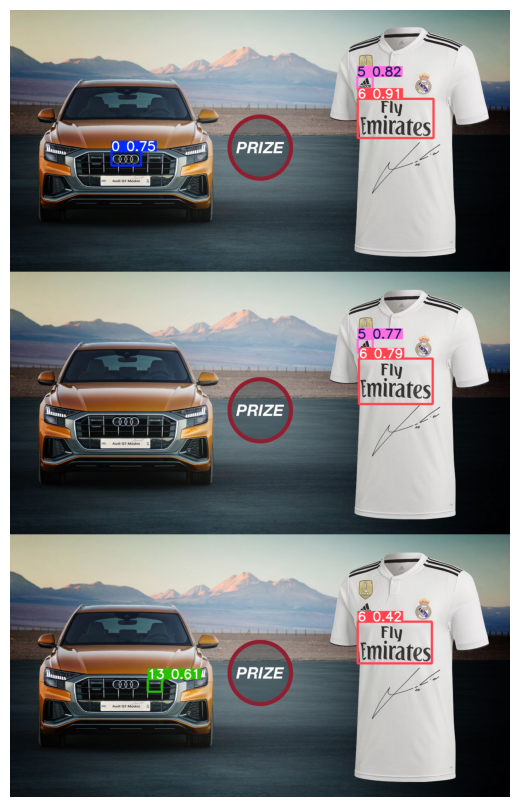

In [100]:
show_output([result_general_base.plot(), result_lp.plot(), result_merged.plot()])